In [1]:
import random

import numpy as np
import pandas as pd

from joblib import load
from sklearn.model_selection import train_test_split

In [2]:
RANDOM_SEED = 42

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [3]:
classifier = load('classifier.joblib')
vectorizer = load('vectorizer.joblib')

In [3]:
DATASET_PATH = './data/output/combined.csv'
df = pd.read_csv(DATASET_PATH)

In [4]:
X, y = df.text, df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
test_df = pd.concat([X_test, y_test], axis=1, ignore_index=True)
test_df.to_csv('./data/output/test.csv', index=False)

In [39]:
X_test = vectorizer.transform(X_test)
score = classifier.score(X_test, y_test)
print(f'Estimated accuracy: {score * 100:.2f}%')

Estimated accuracy: 96.66%


## Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from utils import Language

In [69]:
predictions, labels = classifier.predict(X_test), y_test

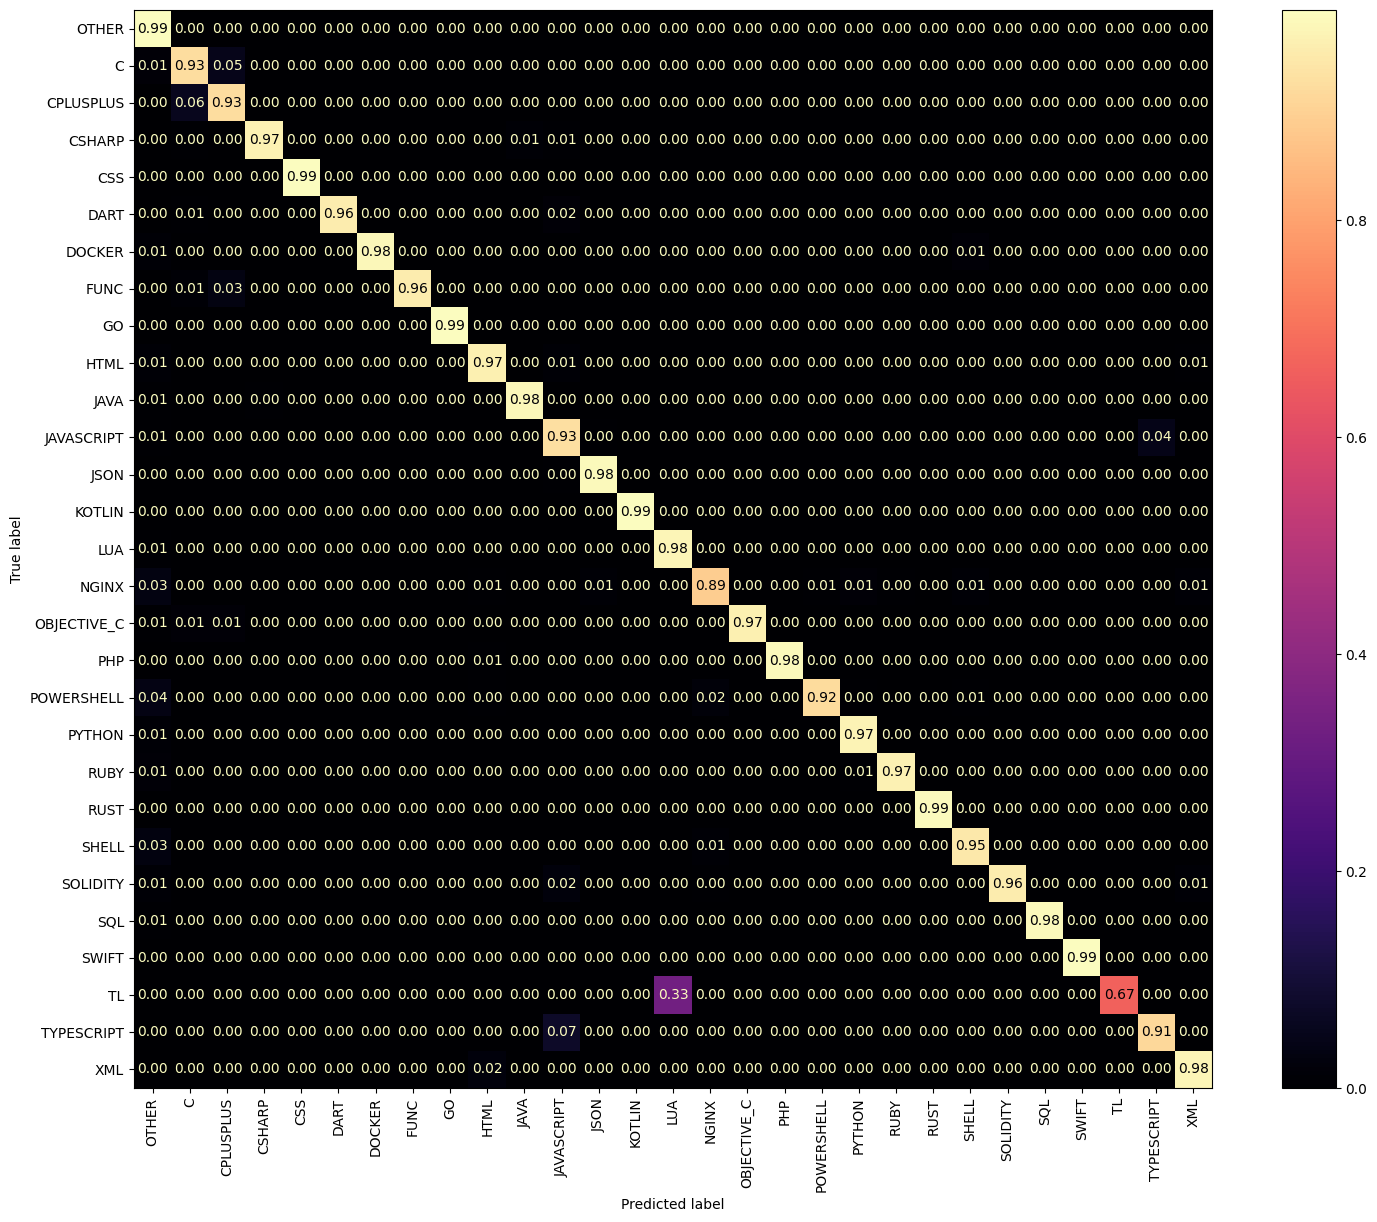

In [99]:
conf_mat = confusion_matrix(labels, predictions, normalize='true')
display_labels = [lang.name.removeprefix('TGLANG_LANGUAGE_') for lang in Language]

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=display_labels)

disp.plot(xticks_rotation='vertical', values_format='.2f', cmap='magma')
disp.ax_.figure.set_size_inches(18, 14)

plt.show()